C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3772\2281737657.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = df.groupby('score_bin')['CACS_binary'].agg(['count', 'sum'])


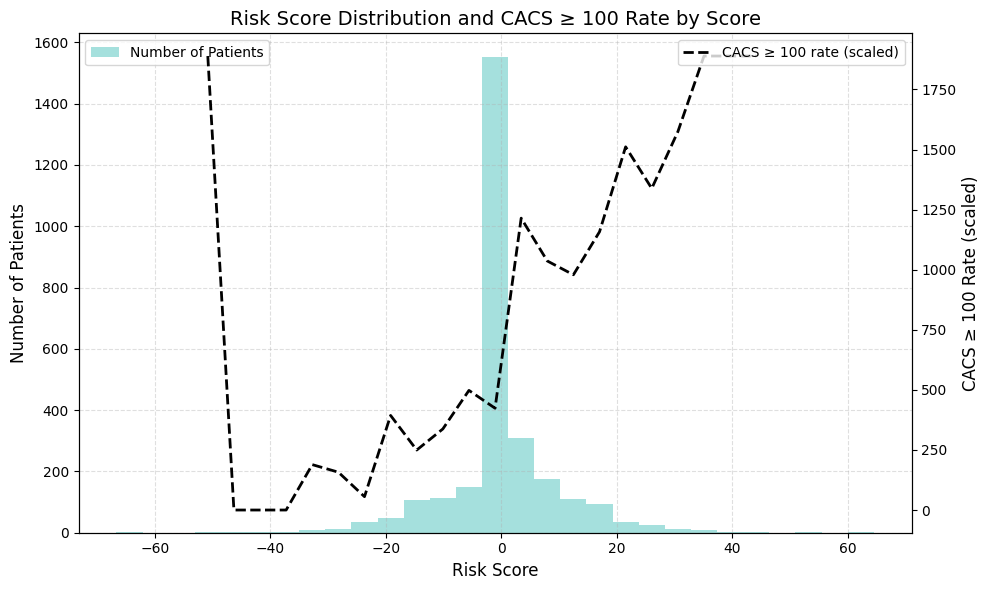

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_excel("CACS_risk_score_output.xlsx")

# 2. Risk Score 및 Outcome 변수 지정
risk_score = df['risk_score']
cacs_binary = df['CACS_binary']

# 3. Risk Score bin 나누기 (예: 30개 bin)
bins = np.linspace(risk_score.min(), risk_score.max(), 30)
df['score_bin'] = pd.cut(risk_score, bins=bins)

# 4. 각 bin에서 CACS ≥ 100 비율 계산
bin_stats = df.groupby('score_bin')['CACS_binary'].agg(['count', 'sum'])
bin_stats['rate'] = bin_stats['sum'] / bin_stats['count']

# x축: bin 중앙값
bin_centers = bins[:-1] + (bins[1] - bins[0]) / 2

# 5. 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

# Histogram (환자 수)
ax1.hist(risk_score, bins=bins, color='lightseagreen', alpha=0.4, label='Number of Patients')
ax1.set_xlabel('Risk Score', fontsize=12)
ax1.set_ylabel('Number of Patients', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.4)

# 선 그래프 (CACS ≥ 100 비율)
ax2 = ax1.twinx()
scaled_rate = bin_stats['rate'] * df['CACS_binary'].value_counts().max()  # scaling for visibility
ax2.plot(bin_centers, scaled_rate, 'k--', label='CACS ≥ 100 rate (scaled)', linewidth=2)
ax2.set_ylabel('CACS ≥ 100 Rate (scaled)', fontsize=12)

# 제목 및 범례
plt.title('Risk Score Distribution and CACS ≥ 100 Rate by Score', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()

# 6. 저장
plt.savefig("RiskScore_Distribution_and_CACS100Rate.png", dpi=300)
plt.savefig("RiskScore_Distribution_and_CACS100Rate.pdf", dpi=300)
plt.show()
